# Python for bioimage analysis

In [90]:
# /// script
# requires-python = ">=3.12"
# dependencies = [
#     "bioio",
#     "bioio-nd2",
#     "imageio",
#     "matplotlib",
#     "ndv[jupyter,vispy]",
#     "numpy",
#     "rich",
#     "tifffile",
# ]
# ///

## <mark style="color: black; background-color: rgb(127,196,125); padding: 3px; border-radius: 5px;">Description</mark>
This notebook focuses on ```numpy``` arrays - the most common representation of images in python.

Numpy stands for *Numerical Python*. It lets us perform mathematical operations on ```numpy``` arrays.  
A ```numpy``` array holds numeric data—such as images!  
In short, ```numpy``` lets us compute on and manipulate images quickly.  

## <mark style="color: black; background-color: rgb(127,196,125); padding: 3px; border-radius: 5px;">Objectives</mark>
We learn how to read in images, manipulate them and visualize them as ```numpy``` arrays, and about common pitfalls. 

## <mark style="color: black; background-color: rgb(127,196,125); padding: 3px; border-radius: 5px;">Table of Contents</mark>
1. Importing libraries
2. Reading images using ```tifffile```
3. View images using ```ndv```
4. ```numpy```: indexing 
5. ```numpy```: multiple channels and z-stacks
6. ```numpy```: generating ```numpy``` arrays
7. Visualize images using ```matplotlib``` (functions) 
8. Reading images using ```bioio```

***

## <mark style="color: black; background-color: rgb(127,196,125); padding: 3px; border-radius: 5px;">1. Import all necessary libraries</mark>

In [216]:
import matplotlib.pyplot as plt
import ndv
import numpy as np
import tifffile
from bioio import BioImage
from rich import print

## <mark style="color: black; background-color: rgb(127,196,125); padding: 3px; border-radius: 5px;">2. Read an image using ```tifffile```</mark>

In [215]:
stack_path = "../../_static/images/python4bia/confocal-series.tif"  # Specify the path to the image
stack = tifffile.imread(stack_path)  # read stack_path and store it in stack

print(type(stack))
print(stack.dtype)
print(stack.shape)

<class 'numpy.ndarray'>

uint8

(25, 2, 400, 400)

## <mark style="color: black; background-color: rgb(127,196,125); padding: 3px; border-radius: 5px;">3. View images using `ndv`</mark>
```ndv``` documentation: https://pyapp-kit.github.io/ndv/latest/  
Reminder: we import ```ndv``` using 
```python
import ndv
```

***

## <mark style="color: black; background-color: rgb(127,196,125); padding: 3px; border-radius: 5px;">4. ```numpy``` arrays - intro, indexing and slicing</mark>

### <mark style="color: black; background-color: rgb(190,223,185); padding: 3px; border-radius: 5px;">4.1 Load an image</mark>

We load the image ```cateye_nonsquare_ds.tif``` using ```tifffile```. 

In [96]:
cat_img_path = "../../_static/images/python4bia/cateye_nonsquare_ds.tif"
cat = tifffile.imread(cat_img_path)

### <mark style="color: black; background-color: rgb(190,223,185); padding: 3px; border-radius: 5px;">4.2 Inspecting ```numpy``` arrays</mark>

#### Inspecting raw intensity values

Remember, the image is now a ```numpy``` array.  

In [219]:
type(cat)

numpy.ndarray

The simplest way of viewing its intensity values is by running the following cell:   

In [97]:
cat

array([[217, 176, 226, 253, 150, 226, 228, 220, 210, 218, 224],
       [215, 181, 236, 219, 225, 220, 215, 210, 141, 173, 105],
       [199, 140, 231, 222, 228, 238, 218, 194, 195, 197,  34],
       [206, 202, 236, 240, 213, 218, 192, 249, 244, 240,  52],
       [226, 220, 235, 202, 188,  50, 226, 242, 233, 224,  49],
       [238, 247, 208, 179, 234,  91, 181, 227, 237, 140,  45],
       [230, 164, 234, 176, 182, 233, 237, 209, 176,  51, 192],
       [246,  86, 204, 218, 199, 202, 230, 208,  51,  61, 222],
       [251,  34, 150, 201, 198, 223, 157,  57,  56, 239, 101],
       [249, 131, 111,  62,  48,  53,  67, 110, 223, 129, 140],
       [253, 148, 169, 184, 150, 182, 197, 236, 206, 142, 197],
       [253, 175, 202, 222, 253, 251, 234, 185, 165, 144, 164]],
      dtype=uint8)

Reminder: we use an alternative print function to print rich text.  
We import it using: 
```python
from rich import print
```

In [98]:
print(cat)

[[217 176 226 253 150 226 228 220 210 218 224]
 [215 181 236 219 225 220 215 210 141 173 105]
 [199 140 231 222 228 238 218 194 195 197  34]
 [206 202 236 240 213 218 192 249 244 240  52]
 [226 220 235 202 188  50 226 242 233 224  49]
 [238 247 208 179 234  91 181 227 237 140  45]
 [230 164 234 176 182 233 237 209 176  51 192]
 [246  86 204 218 199 202 230 208  51  61 222]
 [251  34 150 201 198 223 157  57  56 239 101]
 [249 131 111  62  48  53  67 110 223 129 140]
 [253 148 169 184 150 182 197 236 206 142 197]
 [253 175 202 222 253 251 234 185 165 144 164]]

### <mark style="color: black; background-color: rgb(190,223,185); padding: 3px; border-radius: 5px;">4.3 Inspecting properties of the image</mark>

Let's print a few properties of ```cat```

In [99]:
print(f"Type of the image: {type(cat)}")
print(f"Datatype of the image: {cat.dtype}")
print(f"Shape of the image: {cat.shape}")  # Dimensions of the image
print(f"Minimum pixel value: {cat.min()}")  # Min pixel value
print(f"Maximum pixel value: {cat.max()}")  # Max pixel value
print(f"Mean pixel value: {cat.mean():.2f}")  # Average pixel value

Type of the image: <class 'numpy.ndarray'>

Datatype of the image: uint8

Shape of the image: (12, 11)

Minimum pixel value: 34

Maximum pixel value: 253

Mean pixel value: 184.17

### <mark style="color: black; background-color: rgb(190,223,185); padding: 3px; border-radius: 5px;">4.4 Generate a simple plot of the image</mark>
Reminder: we import ```plt``` using  

```python
import matplotlib.pyplot as plt
```

#### Plot using ```plt.imshow()``` 

### <mark style="color: black; background-color: rgb(252,185,118); padding: 3px; border-radius: 5px;">✍️ Exercise: Code along </mark>

### <mark style="color: black; background-color: rgb(252,185,118); padding: 3px; border-radius: 5px;">✍️ Exercise: Write a plotting function</mark>
Write the previous plotting code as a function

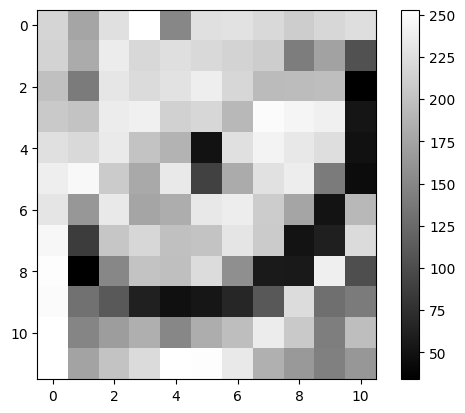

In [102]:
simpleplot(cat)

### <mark style="color: black; background-color: rgb(190,223,185); padding: 3px; border-radius: 5px;">4.5 Plot a simple histogram</mark>

In [103]:
def valueplot(image: np.ndarray, indices: str = "empty", fontsize: int = 10) -> None:
    """
    Show a 2-D array as a grayscale heat-map, print each pixel's value on top,
    and optionally outline pixels or regions.

    Parameters
    ----------
    image : np.ndarray
        Array of shape (rows, cols).
    indices : str, optional
        String with numpy indexing notation using either brackets [] or parentheses ().

        Examples:
        - "(5, 3)" or "[5, 3]" - single pixel
        - "[0:5, 3:7]" or "(0:5, 3:7)" - region from rows 0-4, columns 3-6
        - "(:, 0)" or "[:, 0]" - entire column 0
        - "(2, :)" or "[2, :]" - entire row 2
        - "[:,:]" - entire image
        - "[::2, 1::3]" - every 2nd row, every 3rd column starting from column 1
    """

    if indices == "empty":
        indices = "[0:0, 0:0]"

    def parse_index_string(index_str: str) -> tuple:
        """Parse numpy-style indexing string into tuple of slices/ints."""
        # Remove brackets and parentheses
        index_str = index_str.strip()
        if index_str.startswith("[") and index_str.endswith("]"):
            index_str = index_str[1:-1]
        elif index_str.startswith("(") and index_str.endswith(")"):
            index_str = index_str[1:-1]

        # Split by comma
        parts = [part.strip() for part in index_str.split(",")]

        if len(parts) != 2:
            raise ValueError(
                "Index string must have exactly 2 parts separated by comma"
            )

        result = []
        for part in parts:
            if part == ":" or part == "":
                # Full slice
                result.append(slice(None))
            elif ":" in part:
                # Parse slice notation
                slice_parts = part.split(":")
                start = None if slice_parts[0] == "" else int(slice_parts[0])
                stop = (
                    None
                    if len(slice_parts) < 2 or slice_parts[1] == ""
                    else int(slice_parts[1])
                )
                step = (
                    None
                    if len(slice_parts) < 3 or slice_parts[2] == ""
                    else int(slice_parts[2])
                )
                result.append(slice(start, stop, step))
            else:
                # Single integer
                result.append(int(part))

        return tuple(result)

    if indices is None:
        indices = [None, None]
    else:
        # Parse string notation
        indices = parse_index_string(indices)

    plt.imshow(image, cmap="gray", vmin=np.min(image), vmax=np.max(image))

    # Annotate each pixel with its value
    for i in range(image.shape[0]):  # row
        for j in range(image.shape[1]):  # column
            plt.text(
                j,
                i,
                str(image[i, j]),
                ha="center",
                va="center",
                color="magenta",
                fontsize=fontsize,
            )

    plt.ylabel("row; y; axis = 0", fontsize=fontsize)
    plt.xlabel("column; x; axis = 1", fontsize=fontsize)

    # Handle different types of indices
    if indices is not None and len(indices) == 2:
        row_idx, col_idx = indices

        # Convert indices to ranges for highlighting
        if isinstance(row_idx, slice):
            # Handle slice objects
            start_row = row_idx.start if row_idx.start is not None else 0
            stop_row = row_idx.stop if row_idx.stop is not None else image.shape[0]
            step_row = row_idx.step if row_idx.step is not None else 1

            if start_row < 0:
                start_row = image.shape[0] + start_row
            if stop_row < 0:
                stop_row = image.shape[0] + stop_row
            row_range = list(range(start_row, min(stop_row, image.shape[0]), step_row))
        elif isinstance(row_idx, int):
            # Single row
            if row_idx < 0:
                row_idx = image.shape[0] + row_idx
            row_range = [row_idx] if 0 <= row_idx < image.shape[0] else []
        else:
            row_range = list(range(image.shape[0]))  # All rows if None or invalid

        if isinstance(col_idx, slice):
            # Handle slice objects
            start_col = col_idx.start if col_idx.start is not None else 0
            stop_col = col_idx.stop if col_idx.stop is not None else image.shape[1]
            step_col = col_idx.step if col_idx.step is not None else 1

            if start_col < 0:
                start_col = image.shape[1] + start_col
            if stop_col < 0:
                stop_col = image.shape[1] + stop_col
            col_range = list(range(start_col, min(stop_col, image.shape[1]), step_col))
        elif isinstance(col_idx, int):
            # Single column
            if col_idx < 0:
                col_idx = image.shape[1] + col_idx
            col_range = [col_idx] if 0 <= col_idx < image.shape[1] else []
        else:
            col_range = list(range(image.shape[1]))  # All columns if None or invalid

        # Highlight the region
        for row in row_range:
            for col in col_range:
                rect = plt.Rectangle(
                    (col - 0.5, row - 0.5),
                    1,
                    1,
                    linewidth=2,
                    edgecolor="yellow",
                    facecolor="none",
                )
                plt.gca().add_patch(rect)

    plt.yticks(list(range(image.shape[0])))
    plt.xticks(list(range(image.shape[1])))
    plt.tight_layout()
    plt.show()

### <mark style="color: black; background-color: rgb(252,185,118); padding: 3px; border-radius: 5px;">✍️ Exercise: Code along </mark>

***

### <mark style="color: black; background-color: rgb(190,223,185); padding: 3px; border-radius: 5px;">4.6 Indexing: individual entries</mark>

In this 2D array, the first number indexes axis 0. The second number indexes axis 1.  

|first entry| second entry|
| ------ | ------- |
| axis 0 | axis 1 |
| row    | column |

In [235]:
# Pass numbers directly
print(cat[0, 10])

224

Tip: We can pass variables instead of numbers if the same indices are to be reused: 

In [236]:
# Define variables
row, col = 0, 10
print(cat[row, col])

224

### <mark style="color: black; background-color: rgb(252,185,118); padding: 3px; border-radius: 5px;">✍️ Exercise: Enter different values for ```row``` and ```col```: </mark>
```valueplot``` is a costumn function that visualizes indices provided as strings 

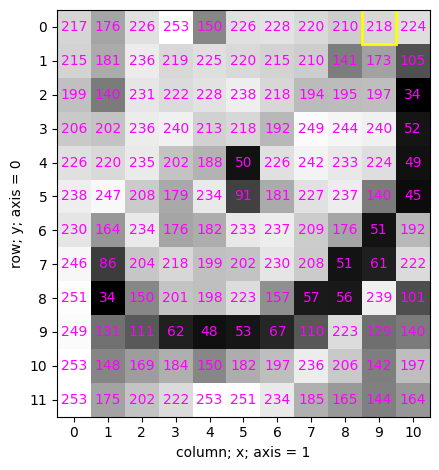

In [234]:
row, col = 0, -2
valueplot(cat, indices=str([row, col]))

### <mark style="color: black; background-color: rgb(190,223,185); padding: 3px; border-radius: 5px;">4.7 Indexing: Rows and columns</mark>

#### Rows

In [ ]:
row = 1
print(cat[row, :])  #
print(cat[row,])  # This is equivalent to the above
print(cat[row])  # If only one number is supplied, it applies to axis 0

[215 181 236 219 225 220 215 210 141 173 105]

[215 181 236 219 225 220 215 210 141 173 105]

[215 181 236 219 225 220 215 210 141 173 105]

#### Columns

### <mark style="color: black; background-color: rgb(252,185,118); padding: 3px; border-radius: 5px;">✍️ Exercise: Uncomment the cell below and run it. </mark>
If there's an error, can we fix it by adding one symbol only? 

In [ ]:
# print(cat[1, ]) # Tries to print the first row
# print(cat[, 1]) # Tries to print the first column

### <mark style="color: black; background-color: rgb(252,185,118); padding: 3px; border-radius: 5px;">✍️ Exercise: Highlight either a full row or a full column</mark>
Experiment with different entries. 

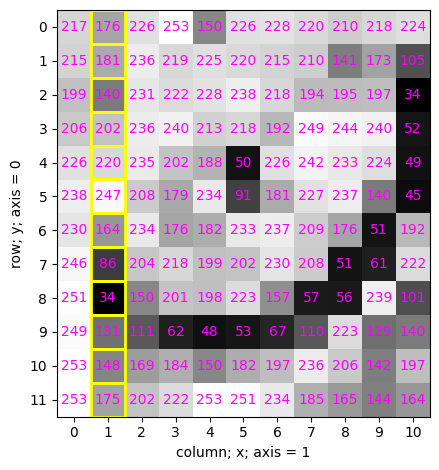

In [109]:
valueplot(cat, indices="[:, 1]")

### <mark style="color: black; background-color: rgb(252,185,118); padding: 3px; border-radius: 5px;">✍️ Exercise: </mark>
Highlight these values using function ```valueplot()```

<img align="center" src="https://raw.githubusercontent.com/HMS-IAC/bobiac/main/_static/images/python4bia/figures/python4bia_print_values.png" alt="Highlight these values" width="300px">

### <mark style="color: black; background-color: rgb(190,223,185); padding: 3px; border-radius: 5px;">4.8 Modifying intensity values using indexing </mark>

### <mark style="color: black; background-color: rgb(252,185,118); padding: 3px; border-radius: 5px;">✍️ Exercise: Make a copy of ```cat```, and name it ```lazercat``` (new variable). Assign a value of 255 to the indicated pixels</mark>

### <mark style="color: black; background-color: rgb(252,185,118); padding: 3px; border-radius: 5px;">✍️ Exercise: Inspect the pixelvalues of ```cat``` and ```lazercat``` ```using simpleplot()```</mark>

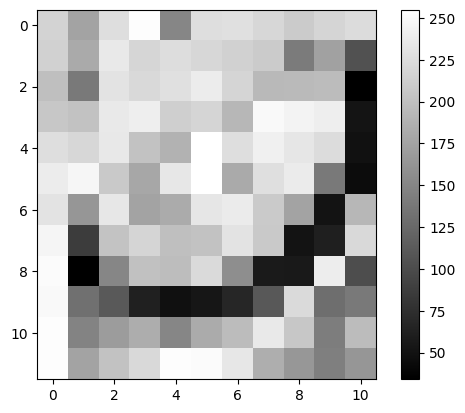

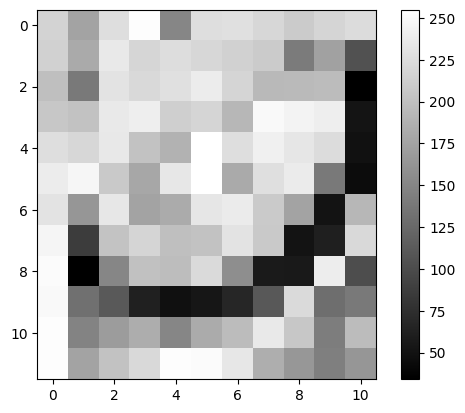

In [112]:
simpleplot(cat)
simpleplot(lazercat)

### <mark style="color: black; background-color: rgb(252,185,118); padding: 3px; border-radius: 5px;">✍️ Exercise: Make a copy of ```cat``` and name it ```pirate```. Assign to all pixels but the rim-pixels a value of 0. Plot to verify!</mark>

In [116]:
# cat = load_cat(cat_img_path) # Run if you accidentally overwrote ```cat```

### <mark style="color: black; background-color: rgb(252,185,118); padding: 3px; border-radius: 5px;">✍️ Exercise: Make a copy of ```cat``` and name it ```h_tabby```. Assign a value of 0 to every other pixel in y to give it a horizontal stripy pattern </mark>

In [118]:
# cat = load_cat(cat_img_path) # Run if you accidentally overwrote ```cat```

In [268]:
h_tabby = cat.copy()
ymax = len(cat[0])  # number of rows
print(f"total number of rows: {ymax}")
# for i in range(0, ymax, 2):
#     ...  # fill in the gap

total number of rows: 11

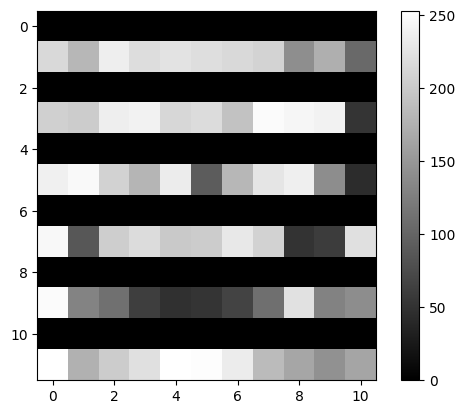

In [275]:
# Test your solution:
simpleplot(h_tabby)

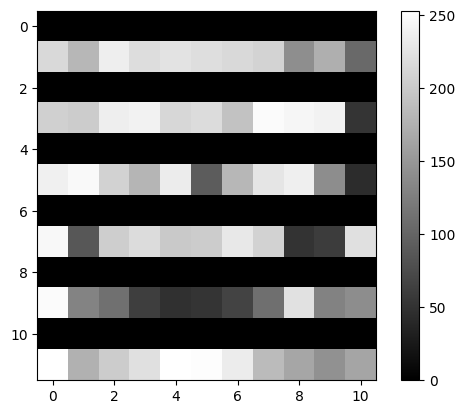

In [277]:
# Test your solution:
simpleplot(h_tabby)

### <mark style="color: black; background-color: rgb(252,185,118); padding: 3px; border-radius: 5px;">✍️ Exercise: Make a copy of ```cat``` and name it ```v_tabby```. Assign a value of 0 to every other pixel in y to give it a vertical stripy pattern </mark>
Do not use a for-loop

In [123]:
# cat = load_cat(cat_img_path) # Run if you accidentally overwrote ```cat```

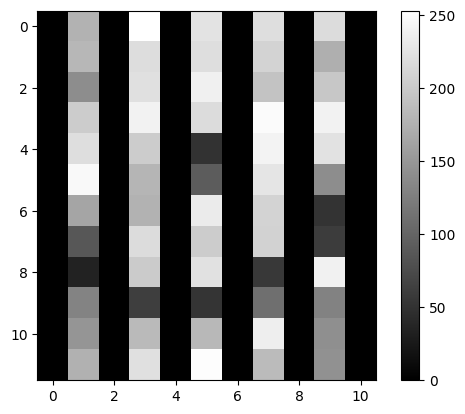

In [265]:
simpleplot(v_tabby)

### <mark style="color: black; background-color: rgb(190,223,185); padding: 3px; border-radius: 5px;">4.9 Boolean indexing</mark>

In [126]:
monocle_bool = np.array(cat, dtype=bool)
monocle_bool[0, :] = False
monocle_bool[-1, :] = False
monocle_bool[:, 0] = False
monocle_bool[:, -1] = False
monocle_bool = ~monocle_bool

```monocle_bool``` is a 2D numpy array of the same dimensions as ```cat```.  
Instead of integer intensity values, its pixel-values are either ```True``` or ```False```.  
Let's inspect ```monocle_bool```

bool

(12, 11)

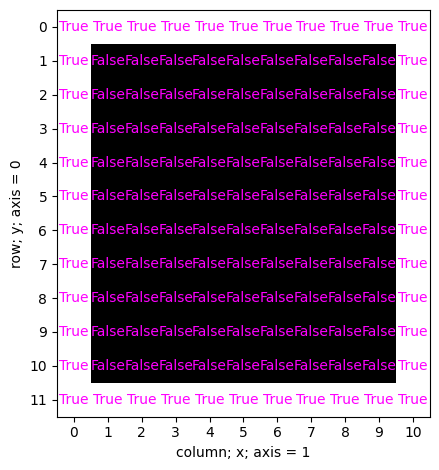

In [127]:
print(monocle_bool.dtype)
print(monocle_bool.shape)
valueplot(monocle_bool)

### <mark style="color: black; background-color: rgb(252,185,118); padding: 3px; border-radius: 5px;">✍️ Exercise: ```monocle``` is a copy of ```cat```. Use ```monocle_bool``` to assign a value of 0 to the rim pixels of ```monocle```. Plot to verify</mark>

In [128]:
# cat = load_cat(cat_img_path) # Run if you accidentally overwrote ```cat```

In [129]:
monocle = cat.copy()

**Tip:**  
<img align="center" src="https://raw.githubusercontent.com/HMS-IAC/bobiac/main/_static/images/python4bia/boolean_indexing.png" alt="boolean_indexing_tip" width="300px">

***

## <mark style="color: black; background-color: rgb(127,196,125); padding: 3px; border-radius: 5px;">5. ```numpy``` and multichannel/z-stacks</mark>


#### Reminder: Previously, we loaded a 2-channel z-stack and named it ```stack``` 

```Python 
stack = tifffile.imread(stack_path)
```

In [ ]:
# Here, we define a function to read the stack from a specified path
def read_stack(
    path: str = stack_path,
) -> np.ndarray:
    stack = tifffile.imread(path)
    return stack

In [ ]:
stack = read_stack(
    stack_path
)  # reloads image "stack". Run this if you accidentally overwrote `stack`

In [133]:
print(stack.dtype)
print(stack.shape)

uint8

(25, 2, 400, 400)

#### Reminder: We can use ```ndv``` to inspect an image

In [134]:
ndv.imshow(stack)

RFBOutputContext()

<IPython.core.display.Javascript object>

### <mark style="color: black; background-color: rgb(252,185,118); padding: 3px; border-radius: 5px;">✍️ Exercise: Create a numpy array ```ch0``` that contains the first channel of ```stack```</mark>
**Bonus**: Create a numpy array ```ch1``` that contains the second channel of ```stack```.  
**Note**: This is 0-indexed!

In [179]:
# Reminder
stack.shape

(25, 2, 400, 400)

In [138]:
print(ch0.shape)

(25, 400, 400)

### <mark style="color: black; background-color: rgb(252,185,118); padding: 3px; border-radius: 5px;">✍️ Exercise: plot ```ch0``` using function ```simpleplot()```</mark>

### <mark style="color: black; background-color: rgb(252,185,118); padding: 3px; border-radius: 5px;">✍️ Exercise: **Create a mean-projection of channel `ch0`**</mark>

**Objective**
Convert the 3-D stack `ch0` (shape `(Z, 400, 400)`) into a 2-D image by averaging over its *z*-planes.



Quick reference [numpy.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html): 


```python
numpy.mean(a, axis=None, dtype=None, out=None, keepdims=<no value>, *, where=<no value>)

```

**a** (`array_like`) – Array containing numbers whose mean is desired. If **a** is not an array, a conversion is attempted.  
**axis** (`int`, `tuple[int]`, or `None`) – Axis or axes along which the means are computed. The default is to compute the mean of the flattened array.

In [183]:
# mean_project_ch0 = ...  # fill in the gaps
# print(mean_project_ch0.shape)
# simpleplot(mean_project_ch0)

### <mark style="color: black; background-color: rgb(252,185,118); padding: 3px; border-radius: 5px;">✍️ Exercise: compute the max projection of ```ch0```</mark>
Collapse ```ch0``` into a 2D image by only displaying the maximum value along z. 
The result should be a (400, 400) array where each value represents the maximum of the all z intensity values at that position.  
This is called max projection. 

https://numpy.org/doc/2.2/reference/generated/numpy.max.html#numpy-max

### <mark style="color: black; background-color: rgb(252,185,118); padding: 3px; border-radius: 5px;">✍️ Exercise (bonus): Try other ```numpy``` projections</mark>

Below are a few operations taken from 
https://numpy.org/doc/2.2/reference/routines.statistics.html 


| Category                 | Function        | What it does along an axis         | Example projection (`axis=0`)                                   |
| ------------------------ | --------------- | ---------------------------------- | --------------------------------------------------------------- |
| **Order statistics**     | `np.percentile` | q-th percentile                    | `p50 = np.percentile(stack, 50, axis=0)` ([numpy.org][1])       |
|                          | `np.quantile`   | q-th quantile (fraction 0-1)       | `q25 = np.quantile(stack, 0.25, axis=0)` ([numpy.org][1])       |
| **Averages & variances** | `np.median`     | Median                             | `med = np.median(stack, axis=0)` ([numpy.org][1])               |
|                          | `np.average`    | Weighted average (pass `weights=`) | `w_avg = np.average(stack, axis=0, weights=w)` ([numpy.org][1]) |
|                          | `np.mean`       | Arithmetic mean                    | `mean = np.mean(stack, axis=0)` ([numpy.org][1])                |
|                          | `np.std`        | Standard deviation                 | `sigma = np.std(stack, axis=0)` ([numpy.org][1])                |
|                          | `np.var`        | Variance                           | `var_map = np.var(stack, axis=0)` ([numpy.org][1])              |

[1]: https://numpy.org/doc/stable/reference/routines.statistics.html "Statistics — NumPy v2.3 Manual"


In [209]:
# Write your code here

***

## <mark style="color: black; background-color: rgb(127,196,125); padding: 3px; border-radius: 5px;">6. Generating ```numpy``` arrays</mark>

There are many reasons to generate ```numpy``` arrays 
* We may need it as a basis for further computations
* We want to generate dummy data to test functions, etc 

### <mark style="color: black; background-color: rgb(190,223,185); padding: 3px; border-radius: 5px;">Create an array of filled with 0s with shape [5, 5]</mark>

In [144]:
zero_array = np.zeros([5, 5])
print(zero_array)
zero_array.dtype

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

dtype('float64')

### <mark style="color: black; background-color: rgb(190,223,185); padding: 3px; border-radius: 5px;">Generate an array of zeroes that has the same properties as ```cat```</mark>

In [148]:
zeroes_cat = np.zeros_like(cat)

In [282]:
print(zeroes_cat)
print(zeroes_cat.shape)
print(zeroes_cat.dtype)

[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]

(12, 11)

uint8

### <mark style="color: black; background-color: rgb(252,185,118); padding: 3px; border-radius: 5px;">✍️ Exercise: Code along: simulate a multichannel image</mark>
* Call it ```dual_ch_fake```
* Of shape [2,9,10]
* dtype is ```np.uint8```
* Each pixel has a random value between 0 (inclusive) and 256 (exclusive)

In [150]:
?np.random.randint
# dual_ch_fake = np.random.randint(..., dtype=np.uint8))

Signature: np.random.randint(low, high=None, size=None, dtype=<class 'int'>)
Docstring:
randint(low, high=None, size=None, dtype=int)

Return random integers from `low` (inclusive) to `high` (exclusive).

Return random integers from the "discrete uniform" distribution of
the specified dtype in the "half-open" interval [`low`, `high`). If
`high` is None (the default), then results are from [0, `low`).

.. note::
    New code should use the `~numpy.random.Generator.integers`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

Parameters
----------
low : int or array-like of ints
    Lowest (signed) integers to be drawn from the distribution (unless
    ``high=None``, in which case this parameter is one above the
    *highest* such integer).
high : int or array-like of ints, optional
    If provided, one above the largest (signed) integer to be drawn
    from the distribution (see above for behavior if ``high=None``).
    If array-lik

Let's plot the two channels:

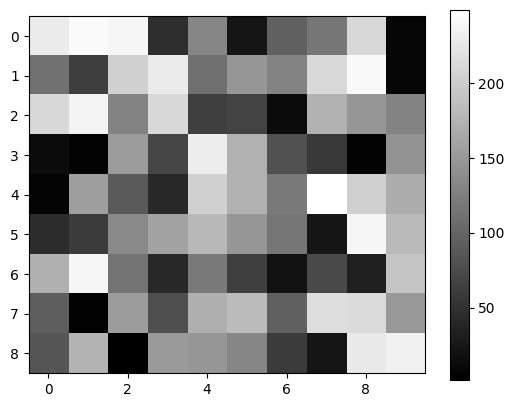

In [152]:
simpleplot(dual_ch_fake[0, :, :])

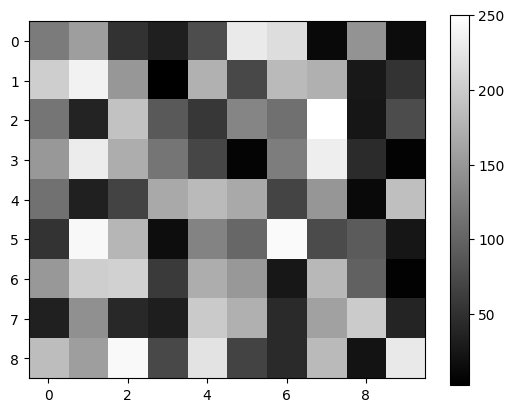

In [153]:
simpleplot(dual_ch_fake[1, :, :])

### <mark style="color: black; background-color: rgb(252,185,118); padding: 3px; border-radius: 5px;">✍️ Exercise (Bonus): Check whether ```np.mean``` does what you expect it to do without using ```numpy``` operations </mark>

Reminder: We can calculate a mean image of the two channels like this: 

In [154]:
mean_of_channels = np.mean(dual_ch_fake, axis=0)

And generate an array of each channel like this: 

In [155]:
ch_0 = dual_ch_fake[0, :, :].copy()
ch_1 = dual_ch_fake[1, :, :].copy()

And compare two elements like this: 

In [156]:
a = 5
b = 5
a == b

True

### <mark style="color: black; background-color: rgb(190,223,185); padding: 3px; border-radius: 5px;">Conclusion: Where possible, use ```numpy``` operations instead of writing your own operations!  </mark>

***

## <mark style="color: black; background-color: rgb(127,196,125); padding: 3px; border-radius: 5px;">7. Visualization using ```matplotlib```</mark>

In [159]:
def show_2_channels(image: np.ndarray, figsize: tuple = (6, 3)) -> None:
    """
    Show a 2-channel image with each channel in a separate subplot.
    Parameters
    ----------
    image : np.ndarray
        A 3D array of shape (2, height, width) representing a 2-channel image.
    Each channel is expected to be a 2D array of pixel values.
    """
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    for i in range(2):
        im = axes[i].imshow(image[i, :, :], cmap="gray", vmin=0, vmax=255)
        axes[i].imshow(image[i, :, :], cmap="gray", vmin=0, vmax=255)
        axes[i].set_title(f"Channel {i}")
        axes[i].axis("off")
        # Add colorbar for this subplot
        fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

Let's test the function using ```dual_ch_fake``` that we previously generated 

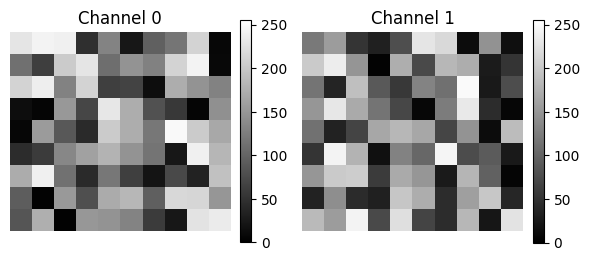

In [210]:
show_2_channels(dual_ch_fake)

### <mark style="color: black; background-color: rgb(252,185,118); padding: 3px; border-radius: 5px;">✍️ Exercise: plot all channels of the following image. Write a function ```show_all_channels()```.</mark>

In [161]:
threechannel = np.random.randint(0, 256, size=(3, 5, 5), dtype=np.uint8)

In [162]:
threechannel.shape

(3, 5, 5)

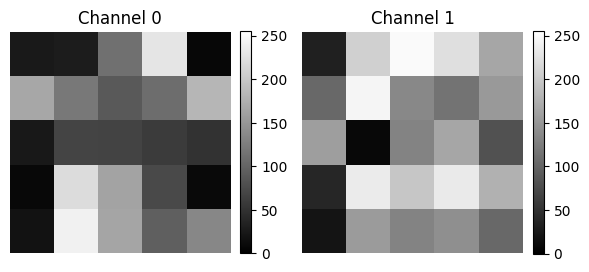

In [163]:
# This works, but it will only show the first two channels.
show_2_channels(threechannel)

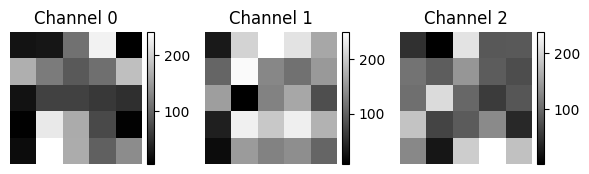

In [165]:
show_all_channels(threechannel)

***

## <mark style="color: black; background-color: rgb(127,196,125); padding: 3px; border-radius: 5px;">8. Bonus: read images using ```bioio```</mark>

### <mark style="color: black; background-color: rgb(190,223,185); padding: 3px; border-radius: 5px;">```bioio``` can read various image file formats</mark>
There are many ways of reading image files. 
[bioio](https://github.com/bioio-devs/bioio)
can read images of different file-formats.  
Different fileformats require different [plugins](https://github.com/bioio-devs/bioio) 



| Plug-in                | Extension   | Repository          |
|------------------------|-------------|---------------------|
| arraylike              | [ArrayLike](https://github.com/bioio-devs/bioio-base/blob/9ff0a17a20d09b1b11639d149b1e71801c9d68d8/bioio_base/types.py#L15)  | Built-In           |
| bioio-czi              | .czi        | [Repo](https://github.com/bioio-devs/bioio-czi)           |
| bioio-dv               | .dv, .r3d   | [Repo](https://github.com/bioio-devs/bioio-dv)           |
| bioio-imageio          | .jpg, .png, [Full List](https://github.com/bioio-devs/bioio-imageio/blob/6829370644b9780cfde35fa9d2cd5cea9f743681/bioio_imageio/reader_metadata.py#L26)  | [Repo](https://github.com/bioio-devs/bioio-imageio)           |
| bioio-lif              | .lif        | [Repo](https://github.com/bioio-devs/bioio-lif)           |
| bioio-nd2              | .nd2        | [Repo](https://github.com/bioio-devs/bioio-nd2)           |
| bioio-ome-tiff         | .ome.tiff, .tiff  | [Repo](https://github.com/bioio-devs/bioio-ome-tiff)           |
| bioio-ome-tiled-tiff   | .tiles.ome.tif   | [Repo](https://github.com/bioio-devs/bioio-ome-tiled-tiff)           |
| bioio-ome-zarr         | .zarr       | [Repo](https://github.com/bioio-devs/bioio-ome-zarr)           |
| bioio-sldy             | .sldy, .dir | [Repo](https://github.com/bioio-devs/bioio-sldy)           |
| bioio-tifffile         | .tif , .tiff| [Repo](https://github.com/bioio-devs/bioio-tifffile)           |
| bioio-tiff-glob        | .tiff (glob)| [Repo](https://github.com/bioio-devs/bioio-tiff-glob)           |
| bioio-bioformats       | [Full List](https://github.com/bioio-devs/bioio-bioformats/blob/175399d10d64194adcc7a6048c7b7537591824de/bioio_bioformats/reader_metadata.py#L24) | [Repo](https://github.com/bioio-devs/bioio-bioformats)    



We use [bioio-nd2](https://github.com/bioio-devs/bioio-nd2) to read an nd2 file.  

### <mark style="color: black; background-color: rgb(126,172,182); padding: 3px; border-radius: 5px;">Example: Read an nd2 file using ```bioio```</mark>
```bioio``` documentation: https://bioio-devs.github.io/bioio/OVERVIEW.html  
Reminder: we import the relevant packages using 

```python
from bioio import BioImage
import bioio-nd2
```


```bioio``` loads the image and metadata into a container. We name the container ```img```

In [166]:
nd2_path = "../../_static/images/python4bia/single_pos_002.nd2"
img = BioImage(nd2_path)

In [167]:
type(img)

bioio.bio_image.BioImage

### <mark style="color: black; background-color: rgb(252,185,118); padding: 3px; border-radius: 5px;">✍️ Exercise: Inspect properties of ```img```</mark>
Below are a few examples of how to show properties of ```img``` taken from [here](https://github.com/bioio-devs/bioio).  
Execute a few of them

```python 
# Get a BioImage object
img = BioImage("my_file.tiff")  # selects the first scene found
img.data  # returns 5D TCZYX ```numpy``` array
img.xarray_data  # returns 5D TCZYX xarray data array backed by numpy
img.dims  # returns a Dimensions object
img.dims.order  # returns string "TCZYX"
img.dims.X  # returns size of X dimension
img.shape  # returns tuple of dimension sizes in TCZYX order
img.get_image_data("CZYX", T=0)  # returns 4D CZYX numpy array

```

### <mark style="color: black; background-color: rgb(190,223,185); padding: 3px; border-radius: 5px;">Extract a ```numpy``` array from the BioImage object</mark>

[numpy documentation](https://numpy.org/doc/stable/)

Reminder: we import ```numpy``` as follows: 
```python
import numpy as np
```

In [169]:
# the image is contained in img.data
cells = img.data

In [170]:
type(cells)  # verify it's a numpy array

numpy.ndarray

In [171]:
cells.dtype  # check the datatype

dtype('uint16')

### <mark style="color: black; background-color: rgb(190,223,185); padding: 3px; border-radius: 5px;">Inspect dimensions of ```stack```</mark>

In [172]:
print(img.dims)  # Reminder:
print(cells.shape)  # only one time-point. This is like a movie with only one frame!

<Dimensions [T: 1, C: 3, Z: 1, Y: 2044, X: 2048]>

(1, 3, 1, 2044, 2048)

### <mark style="color: black; background-color: rgb(190,223,185); padding: 3px; border-radius: 5px;">Use ```.squeeze()``` to remove axes of length one</mark>

To test these concepts, we first generate an array **without** an axis of size one:

In [173]:
simple_list = [1, 2, 3]
simple_array = np.array(simple_list)  # Turn the list into a numpy array

# print a few properties of simple_array
print(type(simple_array))
print(simple_array)
print(simple_array.shape)

<class 'numpy.ndarray'>

[1 2 3]

(3,)

Now, generate an array **with** an axis of length one:

In [174]:
nested_list = [[1, 2, 3]]  # There's extra brackets!
nested_array = np.array(nested_list)

# print a few properties of nested_array
print(type(simple_array))
print(nested_array)
print(nested_array.shape)

<class 'numpy.ndarray'>

[[1 2 3]]

(1, 3)

Next, ```.squeeze()``` removes axes of length one: 

In [175]:
nested_array_squeezed = nested_array.squeeze()

# print a few properties of nested_array_squeezed
print(type(nested_array_squeezed))
print(nested_array_squeezed)
print(nested_array_squeezed.shape)

<class 'numpy.ndarray'>

[1 2 3]

(3,)

### <mark style="color: black; background-color: rgb(252,185,118); padding: 3px; border-radius: 5px;">✍️ Exercise: apply this to image `cells` and print its shape</mark>

Congratulations! ```cells``` is now in the correct format to be viewed and modified! 

### <mark style="color: black; background-color: rgb(252,185,118); padding: 3px; border-radius: 5px;">✍️ Exercise: Plot ```cells```</mark>